I can find all the geoJson data here in this repository: https://github.com/johan/world.geo.json/blob/master/countries.geo.json.
Here is the link to the data, IDK if that makes it easier to access: https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json.

Wnt to make a dashboard version of this https://edgar.jrc.ec.europa.eu/booklet/GHG_emissions_of_all_world_countries_booklet_2023report.pdf

If I want to build a dashboard with trends over time, I will need the summary tables for emissions overtime and trends overtime that way I can compare. But i need to treat them seperately and combine them on my dasahbaord

In [114]:
import pandas as pd

gas_type = { 'Table10s6': 'Emissions trends (all years, with and without LULUCF)'}
excel = pd.ExcelFile('data/GBR_2023_1990_13042023_164306.xlsx')
summary1 = [s for s in excel.sheet_names if s.startswith('Summary1')] 
summary2 = [s for s in excel.sheet_names if s.startswith('Summary2')]

target_sheets = [summary1, summary2, 'Table10s6',]
data_folder = 'data/'

#summary1_header_names = row for row in summary1 if row.startswith('['GREENHOUSE GAS SOURCE AND'] or row.startswith('['SINK'] or row.has['(kt CO2 equivalent)		
#'] or (kt)

In [ ]:
import pandas as pd
import numpy as np

years_table10s6= [str(year) for year in range(1990, 2023+1)]

def detect_header_rows(filepath, sheet_name, keywords, lookahead=10):
    """
    Detect the number of header rows by searching for keywords in the top rows.
    Args:
        filepath
        sheet_name
        keywords
        lookahed 
    Returns
    """
    # Read the top few rows of the Excel sheet without assigning headers
    preview = pd.read_excel(filepath, sheet_name=sheet_name, nrows=lookahead, header=None)

    # Initialise the last detected header row index
    last_header_row = -1
    for i, row in preview.iterrows():
        for cell in row:
            # If the cell contains text and matches any of the keywords, update last_header_row
            if pd.notna(cell) and any(keyword.lower() in str(cell).lower() for keyword in keywords):
                last_header_row = max(last_header_row, i)

    if last_header_row >= 0:
        # Return all rows up to and including the header
        return list(range(last_header_row + 1))
    else:
        raise ValueError("Could not detect headers using provided keywords.")

def read_excel_with_detected_header(filepath, sheet_name, keywords=["(kt)", "kt CO2 equivalent", "SINK CATEGORIES", "GREENHOUSE GAS", "GREENHOUSE GAS SOURCE AND SINK CATEGORIES"] + years_table10s6, flatten=True):
    """
    Read an Excel sheet using dynamically detected headers based on keyword search.
    """
    # Identify the header rows using the keyword search
    header_rows = detect_header_rows(filepath, sheet_name, keywords)
    # Read the Excel sheet, specifying detected header rows
    df = pd.read_excel(filepath, sheet_name=sheet_name, header=header_rows)

    # Flatten multi-index columns
    if flatten and isinstance(df.columns, pd.MultiIndex):
        def clean_column(col):
            # Remove whitespace and ignore any missing parts in column 
            parts = [str(part).strip() for part in col if pd.notna(part)]
            # Keep only parts that contain units or gas names (e.g. CO2, CH4, SF6, etc.)
            keep_parts = [p for p in parts if any(unit in p for unit in ['SINK CATEGORIES', 'GREENHOUSE GAS EMISSIONS','CO2', 'CH4', 'N2O', 'SF6', 'HFC', 'PFC', '(kt)', 'NF', 'NO', 'NMVOC', 'CO', 'SO', 'Base year(1)', 'Change from base to latest' ] + years_table10s6)]
            # Combine into a single column name
            return ' '.join(keep_parts).strip()

        df.columns = [clean_column(col) for col in df.columns]

    return df

filepath = pd.ExcelFile('data/GBR_2023_1990_13042023_164306.xlsx')
df = read_excel_with_detected_header("data/GBR_2023_1990_13042023_164306.xlsx", sheet_name="Table10s6")

df

,GREENHOUSE GAS EMISSIONS,Base year(1) CO2 equivalent (kt),1990,Inventory 1990 Submission 2023 v2 UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND Change from base to latest reported year
0,CO2 emissions without net CO2 from LULUCF,603666.15868,603666.15868,0
1,CO2 emissions with net CO2 from LULUCF,607337.262204,607337.262204,0
2,CH4 emissions without CH4 from LULUCF,145315.661611,145315.661611,0
3,CH4 emissions with CH4 from LULUCF,150886.834782,150886.834782,0
4,N2O emissions without N2O from LULUCF,42524.965409,42524.965409,0
5,N2O emissions with N2O from LULUCF,44435.166057,44435.166057,0
6,HFCs,12068.457467,12068.457467,0
7,PFCs,1483.661309,1483.661309,0
8,Unspecified mix of HFCs and PFCs,"NO,NE","NO,NE",0
9,SF6,1242.828185,1242.828185,0


In [109]:
# Keep the category column
category_col = "GREENHOUSE GAS EMISSIONS"
categories = df[category_col]

# Convert other columns to numeric, coercing errors to NaN. 
# This ensures all emission data is treated as numerical, and strings (footnotes) are ignored
numeric_df = df.drop(columns=[category_col]).apply(pd.to_numeric, errors='coerce')

# Recimbine the category column back
df = pd.concat([categories, numeric_df], axis=1)

# Drop rows that are completely empty but keep the category column
df = df.dropna(axis=0, how='all', subset=numeric_df.columns)
# Drop columns that are completely empty
df = df.dropna(axis=1, how='all')


In [ ]:
#ghg keywords to filter relevant columns. take out air pollutants
# Keep the category column
category_col = "GREENHOUSE GAS EMISSIONS"
categories = df[category_col]

# Convert other columns to numeric, coercing errors to NaN. 
# This ensures all emission data is treated as numerical, and strings (footnotes) are ignored
numeric_df = df.drop(columns=[category_col]).apply(pd.to_numeric, errors='coerce')

# Recimbine the category column back
df = pd.concat([categories, numeric_df], axis=1)

# Drop rows that are completely empty but keep the category column
df = df.dropna(axis=0, how='all', subset=numeric_df.columns)
# Drop columns that are completely empty
df = df.dropna(axis=1, how='all')
years_table10s6= [str(year) for year in range(1990, 2023+1)]
ghg_keywords = ['CO2', 'CH4', 'N2O', 'SF6', 'HFC', 'PFC','Base year (1)', 'Change from base to latest'] + years_table10s6

# Keep category column containing any GHG keywords
cols_to_keep = [category_col]+ [col for col in df.columns if any(k in col for k in ghg_keywords)] 

df_ghg = df[cols_to_keep]

df_ghg


,GREENHOUSE GAS EMISSIONS,Base year(1) CO2 equivalent (kt),1990,Inventory 1990 Submission 2023 v2 UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND Change from base to latest reported year
0,CO2 emissions without net CO2 from LULUCF,603666.158680,603666.158680,0.0
1,CO2 emissions with net CO2 from LULUCF,607337.262204,607337.262204,0.0
2,CH4 emissions without CH4 from LULUCF,145315.661611,145315.661611,0.0
3,CH4 emissions with CH4 from LULUCF,150886.834782,150886.834782,0.0
4,N2O emissions without N2O from LULUCF,42524.965409,42524.965409,0.0
5,N2O emissions with N2O from LULUCF,44435.166057,44435.166057,0.0
6,HFCs,12068.457467,12068.457467,0.0
7,PFCs,1483.661309,1483.661309,0.0
8,Unspecified mix of HFCs and PFCs,NaN,NaN,0.0
9,SF6,1242.828185,1242.828185,0.0


In [73]:
import os
import glob
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

def detect_header_rows(filepath, sheet_name, keywords, lookahead=10):
    """
    Detect the number of header rows by searching for keywords in the top rows.
    """
    # Read the top few rows of the Excel sheet without assigning headers
    preview = pd.read_excel(filepath, sheet_name=sheet_name, nrows=lookahead, header=None)

    # Initialise the last detected header row index
    last_header_row = -1
    for i, row in preview.iterrows():
        for cell in row:
            # If the cell contains text and matches any of the keywords, update last_header_row
            if pd.notna(cell) and any(keyword.lower() in str(cell).lower() for keyword in keywords):
                last_header_row = max(last_header_row, i)

    if last_header_row >= 0:
        # Return all rows up to and including the header
        return list(range(last_header_row + 1))
    else:
        raise ValueError("Could not detect headers using provided keywords.")

def read_excel_with_detected_header(filepath, sheet_name, keywords=["(kt)", "kt CO2 equivalent", "GREENHOUSE GAS"], flatten=True):
    """
    Read an Excel sheet using dynamically detected headers based on keyword search.
    """
    # Identify the header rows using the keyword search
    header_rows = detect_header_rows(filepath, sheet_name, keywords)
    # Read the Excel sheet, specifying detected header rows
    df = pd.read_excel(filepath, sheet_name=sheet_name, header=header_rows)

    # Flatten multi-index columns
    if flatten and isinstance(df.columns, pd.MultiIndex):
        def clean_column(col):
            # Remove whitespace and ignore any missing parts in column 
            parts = [str(part).strip() for part in col if pd.notna(part)]
            # Keep only parts that contain units or gas names (e.g. CO2, CH4, SF6, etc.)
            keep_parts = [p for p in parts if any(unit in p for unit in ['SINK CATEGORIES', 'CO2', 'CH4', 'N2O', 'SF6', 'HFC', 'PFC', '(kt)', 'NF', 'NO', 'NMVOC', 'CO', 'SO'])]
            # Combine into a single column name
            return ' '.join(keep_parts).strip()

        df.columns = [clean_column(col) for col in df.columns]

    return df


# Directory containing Excel files
folder_path = "data"
end_path = 'data/Summary1As3'
sheet_name = 'Summary1.As3'
ghg_keywords = ['CO2', 'CH4', 'N2O', 'SF6', 'HFC', 'PFC']
keywords = ["(kt)", "kt CO2 equivalent", "GREENHOUSE GAS"]

# Loop through all Excel files
for filepath in glob.glob(os.path.join(folder_path, "*.xlsx")):
    try:
        print(f"Processing: {filepath}")
        df = read_excel_with_detected_header(filepath, sheet_name=sheet_name, keywords=keywords)

        category_col = "GREENHOUSE GAS SOURCE AND SINK CATEGORIES"
        categories = df[category_col]

        numeric_df = df.drop(columns=[category_col]).apply(pd.to_numeric, errors='coerce')
        df = pd.concat([categories, numeric_df], axis=1)
        df = df.dropna(axis=0, how='all', subset=numeric_df.columns)
        df = df.dropna(axis=1, how='all')

        cols_to_keep = [category_col] + [col for col in df.columns if any(k in col for k in ghg_keywords)]
        df_ghg = df[cols_to_keep]

        # Save or use df_ghg 
        output_name = os.path.splitext(os.path.basename(filepath))[0] + "_processed.csv"
        df_ghg.to_csv(os.path.join(end_path, output_name), index=False)

    except Exception as e:
        print(f"Error processing {filepath}: {e}")


Processing: data\GBR_2023_1990_13042023_164306.xlsx
Processing: data\GBR_2023_1991_13042023_164356.xlsx
Processing: data\GBR_2023_1992_13042023_164447.xlsx
Processing: data\GBR_2023_1993_13042023_164537.xlsx
Processing: data\GBR_2023_1994_13042023_164627.xlsx
Processing: data\GBR_2023_1995_13042023_164718.xlsx
Processing: data\GBR_2023_1996_13042023_164809.xlsx
Processing: data\GBR_2023_1997_13042023_164900.xlsx
Processing: data\GBR_2023_1998_13042023_164951.xlsx
Processing: data\GBR_2023_1999_13042023_165042.xlsx
Processing: data\GBR_2023_2000_13042023_165133.xlsx
Processing: data\GBR_2023_2001_13042023_165224.xlsx
Processing: data\GBR_2023_2002_13042023_165316.xlsx
Processing: data\GBR_2023_2003_13042023_165408.xlsx
Processing: data\GBR_2023_2004_13042023_165500.xlsx
Processing: data\GBR_2023_2005_13042023_165552.xlsx
Processing: data\GBR_2023_2006_13042023_165645.xlsx
Processing: data\GBR_2023_2007_13042023_165737.xlsx
Processing: data\GBR_2023_2008_13042023_165829.xlsx
Processing: 

In [105]:
import pandas as pd
import os
import glob

# Define all directories for each summary sheet
summary_dirs = {
    "Summary1As1": "data/Summary1As1",
    "Summary1As2": "data/Summary1As2",
    "Summary1As3": "data/Summary1As3"
}

# Create a list to hold all dataframes
all_data = []

# Loop through each directory and label with sheet source
for sheet_name, folder_path in summary_dirs.items():
    file_paths = glob.glob(os.path.join(folder_path, "*.csv"))
    
    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path)
            
            # Standardize column names - fix the CO2 naming inconsistency
            df.columns = df.columns.str.replace('CO2', 'Net CO2 emissions/removals', regex=False)
            
            df["Sheet"] = sheet_name  # Add column to identify sheet
            all_data.append(df)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Combine all sheets into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Check structure
print("Combined shape:", combined_df.shape)
print("Columns:", combined_df.columns.tolist())

# Rename for clarity if needed
combined_df = combined_df.rename(columns={
    "GREENHOUSE GAS SOURCE AND SINK CATEGORIES": "Category"
})

# Check for missing Year values before melting
print("Year column info:")
print(combined_df['Year'].value_counts().sort_index())
print("Missing years:", combined_df['Year'].isna().sum())

# Fill missing years if needed (you might want to handle this differently)
# For now, let's see what's happening
combined_df_clean = combined_df.dropna(subset=['Year'])

# Reshape using melt: unpivot gases into long format
long_df = pd.melt(
    combined_df_clean,
    id_vars=["Category", "Year", "Sheet"],
    var_name="Gas",
    value_name="Emissions_kt"
)

# Convert Year to int if it's not already
long_df['Year'] = long_df['Year'].astype(int)

# Drop rows where Emissions_kt is NaN
long_df = long_df.dropna(subset=["Emissions_kt"])

# Check for missing years in final data
print("Years in final data:", sorted(long_df['Year'].unique()))
print("Year range:", long_df['Year'].min(), "to", long_df['Year'].max())

# Final preview
print(long_df.head())
combined_df_clean.to_csv("data/combine_data.csv", index=False)


Combined shape: (1518, 11)
Columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'Net Net CO2 emissions/removals emissions/removals (kt)', 'CH4', 'N2O', 'HFCs(1) (kt Net CO2 emissions/removals equivalent)', 'PFCs(1)', 'SF6 (kt)', 'Year', 'Sheet', 'Net CO2 emissions/removals (kt)', 'Net Net CO2 emissions/removals (kt)']
Year column info:
Year
1990.0    47
1991.0    47
1992.0    47
1993.0    47
1994.0    46
1995.0    46
1996.0    46
1997.0    46
1998.0    46
1999.0    46
2000.0    46
2001.0    46
2002.0    46
2003.0    46
2004.0    46
2005.0    46
2006.0    46
2007.0    46
2008.0    46
2009.0    46
2010.0    46
2011.0    46
2012.0    46
2013.0    46
2014.0    46
2015.0    46
2016.0    46
2017.0    46
2018.0    46
2019.0    46
2020.0    46
2021.0    46
Name: count, dtype: int64
Missing years: 42
Years in final data: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,

In [106]:
import pandas as pd
import os

# Define specific file paths for each combined CSV
combined_files = {
    "Summary1As1": "data/Summary1As1/Summary1As1_combined.csv",
    "Summary1As2": "data/Summary1As2/Summary1As2_combined.csv",
    "Summary1As3": "data/Summary1As3/Summary1As3_combined.csv"
}

# Create a list to hold all dataframes
all_data = []

# Read each specific combined file
for sheet_name, file_path in combined_files.items():
    try:
        df = pd.read_csv(file_path)
        print(f"Reading {sheet_name} from {os.path.basename(file_path)}")
        
        # More specific column standardization - only replace standalone "CO2" columns
        new_columns = []
        for col in df.columns:
            if col == 'CO2' or col == 'CO2 (kt)':
                new_columns.append('Net CO2 emissions/removals (kt)')
            else:
                new_columns.append(col)
        df.columns = new_columns
        
        df["Sheet"] = sheet_name  # Add column to identify sheet
        all_data.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Combine all sheets into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Check structure
print("Combined shape:", combined_df.shape)
print("Columns:", combined_df.columns.tolist())

# Rename for clarity if needed
combined_df = combined_df.rename(columns={
    "GREENHOUSE GAS SOURCE AND SINK CATEGORIES": "Category"
})

# Check for missing Year values before melting
print("Year column info:")
print(combined_df['Year'].value_counts().sort_index())
print("Missing years:", combined_df['Year'].isna().sum())

# Fill missing years if needed (you might want to handle this differently)
# For now, let's see what's happening
combined_df_clean = combined_df.dropna(subset=['Year'])

# Reshape using melt: unpivot gases into long format
long_df = pd.melt(
    combined_df_clean,
    id_vars=["Category", "Year", "Sheet"],
    var_name="Gas",
    value_name="Emissions_kt"
)

# Convert Year to int if it's not already
long_df['Year'] = long_df['Year'].astype(int)

# Drop rows where Emissions_kt is NaN
long_df = long_df.dropna(subset=["Emissions_kt"])

# Check for missing years in final data
print("Years in final data:", sorted(long_df['Year'].unique()))
print("Year range:", long_df['Year'].min(), "to", long_df['Year'].max())

# Final preview
print(long_df.head())

combined_df_clean.to_csv("data/combined_data_clean2.csv", index=False)


Reading Summary1As1 from Summary1As1_combined.csv
Reading Summary1As2 from Summary1As2_combined.csv
Reading Summary1As3 from Summary1As3_combined.csv
Combined shape: (1476, 10)
Columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'Net CO2 emissions/removals (kt)', 'CH4', 'N2O', 'HFCs(1) (kt CO2 equivalent)', 'PFCs(1)', 'SF6 (kt)', 'Year', 'Sheet', 'Net CO2 (kt)']
Year column info:
Year
1990    47
1991    47
1992    47
1993    47
1994    46
1995    46
1996    46
1997    46
1998    46
1999    46
2000    46
2001    46
2002    46
2003    46
2004    46
2005    46
2006    46
2007    46
2008    46
2009    46
2010    46
2011    46
2012    46
2013    46
2014    46
2015    46
2016    46
2017    46
2018    46
2019    46
2020    46
2021    46
Name: count, dtype: int64
Missing years: 0
Years in final data: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [ ]:
## clean this when you have time
# 
import pandas as pd
import os

# Define specific file paths for each combined CSV
combined_files = {
    "Summary1As1": "data/Summary1As1/Summary1As1_combined.csv",
    "Summary1As2": "data/Summary1As2/Summary1As2_combined.csv",
    "Summary1As3": "data/Summary1As3/Summary1As3_combined.csv"
}

# Create a list to hold all dataframes
all_data = []

# Read each specific combined file
for sheet_name, file_path in combined_files.items():
    try:
        df = pd.read_csv(file_path)
        print(f"\nReading {sheet_name} from {os.path.basename(file_path)}")
        print(f"Original columns: {df.columns.tolist()}")
        
        # More flexible column standardization - if column contains "CO2", standardize it
        new_columns = []
        for col in df.columns:
            if 'CO2' in str(col) and 'equivalent' not in str(col).lower():
                new_columns.append('Net CO2 emissions/removals (kt)')
            else:
                new_columns.append(col)
        df.columns = new_columns
        
        print(f"Standardized columns: {df.columns.tolist()}")
        
        df["Sheet"] = sheet_name  # Add column to identify sheet
        all_data.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Combine all sheets into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Check structure
print("\nCombined shape:", combined_df.shape)
print("Final columns:", combined_df.columns.tolist())

# Rename for clarity if needed
combined_df = combined_df.rename(columns={
    "GREENHOUSE GAS SOURCE AND SINK CATEGORIES": "Category"
})

# Check for missing Year values before melting
print("Year column info:")
print(combined_df['Year'].value_counts().sort_index())
print("Missing years:", combined_df['Year'].isna().sum())

# Fill missing years if needed (you might want to handle this differently)
# For now, let's see what's happening
combined_df_clean = combined_df.dropna(subset=['Year'])

# Reshape using melt: unpivot gases into long format
long_df = pd.melt(
    combined_df_clean,
    id_vars=["Category", "Year", "Sheet"],
    var_name="Gas",
    value_name="Emissions_kt"
)

# Convert Year to int if it's not already
long_df['Year'] = long_df['Year'].astype(int)

# Drop rows where Emissions_kt is NaN
long_df = long_df.dropna(subset=["Emissions_kt"])

# Check for missing years in final data
print("Years in final data:", sorted(long_df['Year'].unique()))
print("Year range:", long_df['Year'].min(), "to", long_df['Year'].max())

# Final preview
print(long_df.head())

combined_df_clean.to_csv("data/combined_data_cleaned.csv", index=False)



Reading Summary1As1 from Summary1As1_combined.csv
Original columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'Net CO2 emissions/removals (kt)', 'CH4', 'N2O', 'HFCs(1) (kt CO2 equivalent)', 'PFCs(1)', 'SF6 (kt)', 'Year']
Standardized columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'Net CO2 emissions/removals (kt)', 'CH4', 'N2O', 'HFCs(1) (kt CO2 equivalent)', 'PFCs(1)', 'SF6 (kt)', 'Year']

Reading Summary1As2 from Summary1As2_combined.csv
Original columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'CO2 (kt)', 'CH4', 'N2O', 'Year']
Standardized columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'Net CO2 emissions/removals (kt)', 'CH4', 'N2O', 'Year']

Reading Summary1As3 from Summary1As3_combined.csv
Original columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'Net CO2 (kt)', 'CH4', 'N2O', 'Year']
Standardized columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'Net CO2 emissions/removals (kt)', 'CH4', 'N2O', 'Year']

Combined shape: (1476, 9)
Final columns: [

In [102]:
import pandas as pd
import os

# Define specific file paths for each combined CSV
combined_files = {
    "Summary1As1": "data/Summary1As1/Summary1As1_combined.csv",
    "Summary1As2": "data/Summary1As2/Summary1As2_combined.csv",
    "Summary1As3": "data/Summary1As3/Summary1As3_combined.csv"
}

# Create a list to hold all dataframes
all_data = []

# Read each specific combined file
for sheet_name, file_path in combined_files.items():
    try:
        df = pd.read_csv(file_path)
        print(f"Reading {sheet_name} from {os.path.basename(file_path)}")
        
        # Standardize column names - fix the CO2 naming inconsistency
        df.columns = df.columns.str.replace('CO2', 'Net CO2 emissions/removals', regex=False)
        
        df["Sheet"] = sheet_name  # Add column to identify sheet
        all_data.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Combine all sheets into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Check structure
print("Combined shape:", combined_df.shape)
print("Columns:", combined_df.columns.tolist())

# Rename for clarity if needed
combined_df = combined_df.rename(columns={
    "GREENHOUSE GAS SOURCE AND SINK CATEGORIES": "Category"
})

# Check for missing Year values before melting
print("Year column info:")
print(combined_df['Year'].value_counts().sort_index())
print("Missing years:", combined_df['Year'].isna().sum())

# Fill missing years if needed (you might want to handle this differently)
# For now, let's see what's happening
combined_df_clean = combined_df.dropna(subset=['Year'])

# Reshape using melt: unpivot gases into long format
long_df = pd.melt(
    combined_df_clean,
    id_vars=["Category", "Year", "Sheet"],
    var_name="Gas",
    value_name="Emissions_kt"
)

# Convert Year to int if it's not already
long_df['Year'] = long_df['Year'].astype(int)

# Drop rows where Emissions_kt is NaN
long_df = long_df.dropna(subset=["Emissions_kt"])

# Check for missing years in final data
print("Years in final data:", sorted(long_df['Year'].unique()))
print("Year range:", long_df['Year'].min(), "to", long_df['Year'].max())

# Final preview
print(long_df.head())

combined_df_clean.to_csv("data/combined_data_clean.csv", index=False)


Reading Summary1As1 from Summary1As1_combined.csv
Reading Summary1As2 from Summary1As2_combined.csv
Reading Summary1As3 from Summary1As3_combined.csv
Combined shape: (1476, 11)
Columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'Net Net CO2 emissions/removals emissions/removals (kt)', 'CH4', 'N2O', 'HFCs(1) (kt Net CO2 emissions/removals equivalent)', 'PFCs(1)', 'SF6 (kt)', 'Year', 'Sheet', 'Net CO2 emissions/removals (kt)', 'Net Net CO2 emissions/removals (kt)']
Year column info:
Year
1990    47
1991    47
1992    47
1993    47
1994    46
1995    46
1996    46
1997    46
1998    46
1999    46
2000    46
2001    46
2002    46
2003    46
2004    46
2005    46
2006    46
2007    46
2008    46
2009    46
2010    46
2011    46
2012    46
2013    46
2014    46
2015    46
2016    46
2017    46
2018    46
2019    46
2020    46
2021    46
Name: count, dtype: int64
Missing years: 0
Years in final data: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004

In [101]:
import pandas as pd
import os
import glob

# Define all directories for each summary sheet
summary_dirs = {
    "Summary1As1": "data/Summary1As1",
    "Summary1As2": "data/Summary1As2",
    "Summary1As3": "data/Summary1As3"
}

# Create a list to hold all dataframes
all_data = []

# Loop through each directory and label with sheet source
for sheet_name, folder_path in summary_dirs.items():
    file_paths = glob.glob(os.path.join(folder_path, "*.csv"))
    
    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path)
            
            # Standardize column names - fix the CO2 naming inconsistency
            df.columns = df.columns.str.replace('CO2', 'Net CO2 emissions/removals', regex=False)
            
            df["Sheet"] = sheet_name  # Add column to identify sheet
            all_data.append(df)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Combine all sheets into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Check structure
print("Combined shape:", combined_df.shape)
print("Columns:", combined_df.columns.tolist())

# Rename for clarity if needed
combined_df = combined_df.rename(columns={
    "GREENHOUSE GAS SOURCE AND SINK CATEGORIES": "Category"
})

# Check for missing Year values before melting
print("Year column info:")
print(combined_df['Year'].value_counts().sort_index())
print("Missing years:", combined_df['Year'].isna().sum())

# Fill missing years if needed (you might want to handle this differently)
# For now, let's see what's happening
combined_df_clean = combined_df.dropna(subset=['Year'])

# Reshape using melt: unpivot gases into long format
long_df = pd.melt(
    combined_df_clean,
    id_vars=["Category", "Year", "Sheet"],
    var_name="Gas",
    value_name="Emissions_kt"
)

# Convert Year to int if it's not already
long_df['Year'] = long_df['Year'].astype(int)

# Drop rows where Emissions_kt is NaN
long_df = long_df.dropna(subset=["Emissions_kt"])

# Check for missing years in final data
print("Years in final data:", sorted(long_df['Year'].unique()))
print("Year range:", long_df['Year'].min(), "to", long_df['Year'].max())

# Final preview
print(long_df.head())


combined_df_clean.to_csv("data/combined_data_clean2.csv", index=False)

Combined shape: (2994, 11)
Columns: ['GREENHOUSE GAS SOURCE AND SINK CATEGORIES', 'Net Net CO2 emissions/removals emissions/removals (kt)', 'CH4', 'N2O', 'HFCs(1) (kt Net CO2 emissions/removals equivalent)', 'PFCs(1)', 'SF6 (kt)', 'Year', 'Sheet', 'Net CO2 emissions/removals (kt)', 'Net Net CO2 emissions/removals (kt)']
Year column info:
Year
1990.0    94
1991.0    94
1992.0    94
1993.0    94
1994.0    92
1995.0    92
1996.0    92
1997.0    92
1998.0    92
1999.0    92
2000.0    92
2001.0    92
2002.0    92
2003.0    92
2004.0    92
2005.0    92
2006.0    92
2007.0    92
2008.0    92
2009.0    92
2010.0    92
2011.0    92
2012.0    92
2013.0    92
2014.0    92
2015.0    92
2016.0    92
2017.0    92
2018.0    92
2019.0    92
2020.0    92
2021.0    92
Name: count, dtype: int64
Missing years: 42
Years in final data: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,

In [100]:
import pandas as pd
import os
import glob

# Define all directories for each summary sheet
summary_dirs = {
    "Summary1As1": "data/Summary1As1/Summary1As1_combined",
    "Summary1As2": "data/Summary1As2/Summary1As2_combined",
    "Summary1As3": "data/Summary1As3/Summary1As3_combined"
}

# Create a list to hold all dataframes
all_data = []

# Loop through each directory and label with sheet source
for sheet_name, folder_path in summary_dirs.items():
    file_paths = glob.glob(os.path.join(folder_path, "*.csv"))
    
    # Only take the first CSV file found in each directory
    if file_paths:
        file_path = file_paths[0]  # Take only the first CSV file
        try:
            df = pd.read_csv(file_path)
            print(f"Reading {sheet_name} from {os.path.basename(file_path)}")
            
            # Standardize column names - fix the CO2 naming inconsistency
            df.columns = df.columns.str.replace('CO2', 'Net CO2 emissions/removals', regex=False)
            
            df["Sheet"] = sheet_name  # Add column to identify sheet
            all_data.append(df)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Combine all sheets into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Check structure
print("Combined shape:", combined_df.shape)
print("Columns:", combined_df.columns.tolist())

# Rename for clarity if needed
combined_df = combined_df.rename(columns={
    "GREENHOUSE GAS SOURCE AND SINK CATEGORIES": "Category"
})

# Check for missing Year values before melting
print("Year column info:")
print(combined_df['Year'].value_counts().sort_index())
print("Missing years:", combined_df['Year'].isna().sum())

# Fill missing years if needed (you might want to handle this differently)
# For now, let's see what's happening
combined_df_clean = combined_df.dropna(subset=['Year'])

# Reshape using melt: unpivot gases into long format
long_df = pd.melt(
    combined_df_clean,
    id_vars=["Category", "Year", "Sheet"],
    var_name="Gas",
    value_name="Emissions_kt"
)

# Convert Year to int if it's not already
long_df['Year'] = long_df['Year'].astype(int)

# Drop rows where Emissions_kt is NaN
long_df = long_df.dropna(subset=["Emissions_kt"])

# Check for missing years in final data
print("Years in final data:", sorted(long_df['Year'].unique()))
print("Year range:", long_df['Year'].min(), "to", long_df['Year'].max())

# Final preview
print(long_df.head())

combined_df_clean.to_csv("data/combined_data_clean2.csv", index=False)


ValueError: No objects to concatenate

In [ ]:
import pandas as pd
import glob
import os

# Paths to each summary folder
paths = {
    "Summary1As1": "data/Summary1As1",
    "Summary1As2": "data/Summary1As2",
    "Summary1As3": "data/Summary1As3",
}

# Dictionary to hold dataframes
summary_dfs = {}

# Read and combine all CSVs from each folder
for key, path in paths.items():
    files = glob.glob(os.path.join(path, "*.csv"))
    df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
    df['SummarySheet'] = key  # Add a column to indicate which summary it came from
    summary_dfs[key] = df


##Currently works well for summary 1 sheet but can't do table10 because there are two tables in one sheet and also keywords should include all the years. --> 

Now need to get rid of inventory 1990 UNITED KINGDOM....

In [ ]:

#### keep this since it combines all data
import os
import glob
import pandas as pd

def detect_header_rows(filepath, sheet_name, keywords, lookahead=10):
    preview = pd.read_excel(filepath, sheet_name=sheet_name, nrows=lookahead, header=None)
    last_header_row = -1
    for i, row in preview.iterrows():
        for cell in row:
            if pd.notna(cell) and any(keyword.lower() in str(cell).lower() for keyword in keywords):
                last_header_row = max(last_header_row, i)
    if last_header_row >= 0:
        return list(range(last_header_row + 1))
    else:
        raise ValueError("Could not detect headers using provided keywords.")

def read_excel_with_detected_header(filepath, sheet_name, keywords=["(kt)", "kt CO2 equivalent", "GREENHOUSE GAS"], flatten=True):
    header_rows = detect_header_rows(filepath, sheet_name, keywords)
    df = pd.read_excel(filepath, sheet_name=sheet_name, header=header_rows)
    if flatten and isinstance(df.columns, pd.MultiIndex):
        def clean_column(col):
            parts = [str(part).strip() for part in col if pd.notna(part)]
            keep_parts = [p for p in parts if any(unit in p for unit in ['SINK CATEGORIES', 'CO2', 'CH4', 'N2O', 'SF6', 'HFC', 'PFC', '(kt)', 'NF', 'NO', 'NMVOC', 'CO', 'SO'])]
            return ' '.join(keep_parts).strip()
        df.columns = [clean_column(col) for col in df.columns]
    return df

def extract_year_from_filename(filename):
    parts = filename.split('_')
    if len(parts) > 2:
        try:
            return int(parts[2])
        except ValueError:
            return None
    return None

# Paths and config
folder_path = "data"
sheet_name = "Summary1.As1"
output_folder = os.path.join(folder_path, "Summary1As1")
os.makedirs(output_folder, exist_ok=True)
ghg_keywords = ['CO2', 'CH4', 'N2O', 'SF6', 'HFC', 'PFC']
category_col = "GREENHOUSE GAS SOURCE AND SINK CATEGORIES"
header_keywords = ["(kt)", "kt CO2 equivalent", "GREENHOUSE GAS"]

# Step 1: Process each Excel file, save processed CSV
for filepath in glob.glob(os.path.join(folder_path, "*.xlsx")):
    try:
        print(f"Processing: {filepath}")
        df = read_excel_with_detected_header(filepath, sheet_name=sheet_name, keywords=header_keywords)

        categories = df[category_col]
        numeric_df = df.drop(columns=[category_col]).apply(pd.to_numeric, errors='coerce')
        df_clean = pd.concat([categories, numeric_df], axis=1)
        df_clean = df_clean.dropna(axis=0, how='all', subset=numeric_df.columns)
        df_clean = df_clean.dropna(axis=1, how='all')

        cols_to_keep = [category_col] + [col for col in df_clean.columns if any(k in col for k in ghg_keywords)]
        df_ghg = df_clean[cols_to_keep]

        year = extract_year_from_filename(os.path.basename(filepath))
        if year is not None:
            df_ghg = df_ghg.copy()  # make an explicit copy to avoid the warning
            df_ghg.loc[:, 'Year'] = year

        else:
            print(f"Warning: Could not extract year from filename {filepath}")

        output_name = os.path.splitext(os.path.basename(filepath))[0] + "_processed.csv"
        df_ghg.to_csv(os.path.join(output_folder, output_name), index=False)

    except Exception as e:
        print(f"Error processing {filepath}: {e}")

# Step 2: Combine all processed CSVs into one DataFrame
all_processed_files = glob.glob(os.path.join(output_folder, "*_processed.csv"))
df_list = [pd.read_csv(f) for f in all_processed_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Step 3: Summarize emissions by year
emission_cols = [col for col in combined_df.columns if col not in [category_col, 'Year']]
summary_by_year = combined_df.groupby('Year')[emission_cols].sum()

print("Summary of emissions by year:")
print(summary_by_year)

# Optional: save combined summary CSV
combined_summary_csv = os.path.join(output_folder, "Summary1As1_combined.csv")
combined_df.to_csv(combined_summary_csv, index=False)
print(f"Combined CSV saved to {combined_summary_csv}")


Processing: data\GBR_2023_1990_13042023_164306.xlsx
Processing: data\GBR_2023_1991_13042023_164356.xlsx
Processing: data\GBR_2023_1992_13042023_164447.xlsx
Processing: data\GBR_2023_1993_13042023_164537.xlsx
Processing: data\GBR_2023_1994_13042023_164627.xlsx
Processing: data\GBR_2023_1995_13042023_164718.xlsx
Processing: data\GBR_2023_1996_13042023_164809.xlsx
Processing: data\GBR_2023_1997_13042023_164900.xlsx
Processing: data\GBR_2023_1998_13042023_164951.xlsx
Processing: data\GBR_2023_1999_13042023_165042.xlsx
Processing: data\GBR_2023_2000_13042023_165133.xlsx
Processing: data\GBR_2023_2001_13042023_165224.xlsx
Processing: data\GBR_2023_2002_13042023_165316.xlsx
Processing: data\GBR_2023_2003_13042023_165408.xlsx
Processing: data\GBR_2023_2004_13042023_165500.xlsx
Processing: data\GBR_2023_2005_13042023_165552.xlsx
Processing: data\GBR_2023_2006_13042023_165645.xlsx
Processing: data\GBR_2023_2007_13042023_165737.xlsx
Processing: data\GBR_2023_2008_13042023_165829.xlsx
Processing: 

In [ ]:
import pandas as pd

extreme_weather = pd.read_excel('data/EM-DATA/public_emdat_custom_request_2025-06-11_b91b764b-7189-4747-8449-5320a1f25aed.xlsx')
extreme_weather_uk = extreme_weather[extreme_weather['ISO'] == 'GBR']

hazards = ['Wildfire', 'Flood', 'Drought', 'Heatwave', 'Extreme temperature', 'Storm']
extreme_weather_uk = extreme_weather_uk[extreme_weather_uk['Disaster Type'].isin(hazards)]

extreme_weather_uk



,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
8,1990-0152-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,41.652196,NaN,2003-07-01,2023-09-25
32,1990-0717-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,Daria,GBR,...,NaN,NaN,3050000.0,7322543.0,3400000.0,8162835.0,41.652196,NaN,2007-05-08,2023-09-25
42,1990-0718-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,Herta,GBR,...,NaN,NaN,NaN,NaN,10000.0,24008.0,41.652196,NaN,2007-05-09,2023-09-25
48,1990-0719-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,Judith,GBR,...,NaN,NaN,30000.0,72025.0,60000.0,144050.0,41.652196,NaN,2008-10-21,2023-09-25
52,1990-0720-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,Nana,GBR,...,NaN,NaN,30000.0,72025.0,70000.0,168058.0,41.652196,NaN,2007-05-09,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,2022-0465-GBR,No,nat-met-ext-hea,Natural,Meteorological,Extreme temperature,Heat wave,NaN,NaN,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,93.294607,NaN,2022-07-28,2023-09-26
1606,2022-9405-GBR,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,93.294607,NaN,2022-08-19,2023-09-26
1636,2023-0438-GBR,No,nat-met-ext-hea,Natural,Meteorological,Extreme temperature,Heat wave,NaN,NaN,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,97.134993,NaN,2024-08-16,2024-10-01
1684,2023-0724-GBR,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Storm 'Ciaran',GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,97.134993,NaN,2023-11-10,2023-12-07


In [19]:
import pandas as pd
as1 = pd.read_csv('data/Summary1As1/GBR_2023_1990_13042023_164306_processed_as1.csv')
as2 = pd.read_csv('data/Summary1As2/GBR_2023_1990_13042023_164306_processed_as2.csv')
as3 = pd.read_csv('data/Summary1As3/GBR_2023_1990_13042023_164306_processed_as3.csv')


as1_as2 = pd.concat([as1, as2], axis=0)
as1_as2
as1_as2_as3 = pd.concat([as1_as2, as3], axis=0)


<Axes: >

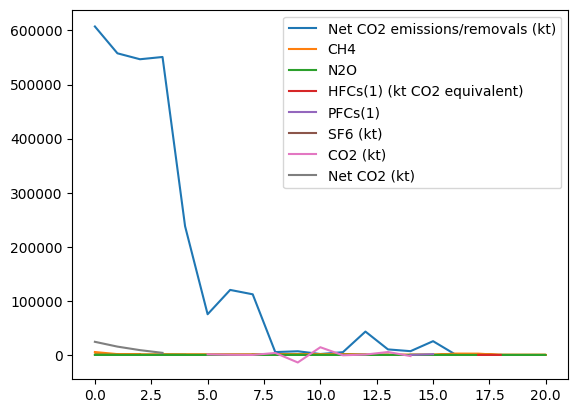

In [52]:
import matplotlib.pyplot as plt

as1_as2_as3.plot()

In [ ]:
as1_as2_as3
fig, ax = plt.subplots()
ax.plot()

,GREENHOUSE GAS SOURCE AND SINK CATEGORIES,Net CO2 emissions/removals (kt),CH4,N2O,HFCs(1) (kt CO2 equivalent),PFCs(1),SF6 (kt),CO2 (kt),Net CO2 (kt)
0,Total national emissions and removals,607337.262204,5388.815528,167.679872,12068.457467,1483.661309,0.052886,NaN,NaN
1,1. Energy,557715.502914,1496.871500,12.326489,NaN,NaN,NaN,NaN,NaN
2,A. Fuel combustion Reference approach(2),546748.251767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sec...,550928.410523,129.657787,12.176230,NaN,NaN,NaN,NaN,NaN
4,1. Energy industries,238059.490913,9.327512,4.821631,NaN,NaN,NaN,NaN,NaN
5,2. Manufacturing industries and construction ...,75237.164239,4.096344,0.982842,NaN,NaN,NaN,NaN,NaN
6,3. Transport,120222.300466,50.831617,4.867555,NaN,NaN,NaN,NaN,NaN
7,4. Other sectors,112116.017450,65.260053,1.315869,NaN,NaN,NaN,NaN,NaN
8,5. Other,5293.437455,0.142261,0.188334,NaN,NaN,NaN,NaN,NaN
9,B. Fugitive emissions from fuels,6787.092392,1367.213713,0.150259,NaN,NaN,NaN,NaN,NaN


In [69]:
def extract_emission_year(filename):
    # Split by underscore and get the 3rd part
    parts = filename.split('_')
    # parts[2] should be the emission year as string
    try:
        return int(parts[2])
    except:
        return None

import os
import glob
import pandas as pd

def process_summary_dir(dir_path, sheet_name, keywords, ghg_keywords):
    all_dfs = []
    for filepath in glob.glob(os.path.join(dir_path, "*.xlsx")):
        filename = os.path.basename(filepath)
        year = extract_emission_year(filename)
        if year is None:
            print(f"Skipping file (cannot find year): {filename}")
            continue
        
        try:
            df = read_excel_with_detected_header(filepath, sheet_name=sheet_name, keywords=keywords)
            category_col = "GREENHOUSE GAS SOURCE AND SINK CATEGORIES"
            categories = df[category_col]
            
            numeric_df = df.drop(columns=[category_col]).apply(pd.to_numeric, errors='coerce')
            df = pd.concat([categories, numeric_df], axis=1)
            df = df.dropna(axis=0, how='all', subset=numeric_df.columns)
            df = df.dropna(axis=1, how='all')
            
            cols_to_keep = [category_col] + [col for col in df.columns if any(k in col for k in ghg_keywords)]
            df_ghg = df[cols_to_keep]
            
            # Add year column
            df_ghg['Year'] = year
            
            all_dfs.append(df_ghg)
        except Exception as e:
            print(f"Error processing {filename}: {e}")
            
    combined_df = pd.concat(all_dfs, ignore_index=True)
    return combined_df

# Example usage
keywords = ["(kt)", "kt CO2 equivalent", "GREENHOUSE GAS"]
ghg_keywords = ['CO2', 'CH4', 'N2O', 'SF6', 'HFC', 'PFC']

summary1_as1_dir = "data/Summary1.As1"
summary1_as2_dir = "data/Summary1.As2"
summary1_as3_dir = "data/Summary1.As3"

df_as1 = process_summary_dir(summary1_as1_dir, 'Summary1.As1', keywords, ghg_keywords)
df_as2 = process_summary_dir(summary1_as2_dir, 'Summary1.As2', keywords, ghg_keywords)
df_as3 = process_summary_dir(summary1_as3_dir, 'Summary1.As3', keywords, ghg_keywords)


ValueError: No objects to concatenate

#PRECLEANING EM-DATA


In [62]:
import pandas as pd

extreme_weather = pd.read_excel('data/EM-DATA/public_emdat_custom_request_2025-06-11_b91b764b-7189-4747-8449-5320a1f25aed.xlsx')
extreme_weather_uk = extreme_weather[extreme_weather['ISO'] == 'GBR']

hazards = ['Wildfire', 'Flood', 'Drought', 'Heatwave', 'Extreme temperature', 'Storm']
extreme_weather_uk = extreme_weather_uk[extreme_weather_uk['Disaster Type'].isin(hazards)]

extreme_weather_uk



,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
8,1990-0152-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,41.652196,NaN,2003-07-01,2023-09-25
32,1990-0717-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,Daria,GBR,...,NaN,NaN,3050000.0,7322543.0,3400000.0,8162835.0,41.652196,NaN,2007-05-08,2023-09-25
42,1990-0718-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,Herta,GBR,...,NaN,NaN,NaN,NaN,10000.0,24008.0,41.652196,NaN,2007-05-09,2023-09-25
48,1990-0719-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,Judith,GBR,...,NaN,NaN,30000.0,72025.0,60000.0,144050.0,41.652196,NaN,2008-10-21,2023-09-25
52,1990-0720-GBR,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,Nana,GBR,...,NaN,NaN,30000.0,72025.0,70000.0,168058.0,41.652196,NaN,2007-05-09,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,2022-0465-GBR,No,nat-met-ext-hea,Natural,Meteorological,Extreme temperature,Heat wave,NaN,NaN,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,93.294607,NaN,2022-07-28,2023-09-26
1606,2022-9405-GBR,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,93.294607,NaN,2022-08-19,2023-09-26
1636,2023-0438-GBR,No,nat-met-ext-hea,Natural,Meteorological,Extreme temperature,Heat wave,NaN,NaN,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,97.134993,NaN,2024-08-16,2024-10-01
1684,2023-0724-GBR,No,nat-met-sto-ext,Natural,Meteorological,Storm,Extra-tropical storm,NaN,Storm 'Ciaran',GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,97.134993,NaN,2023-11-10,2023-12-07


🔵 Page 1: GHG Emissions Time Series (UNFCCC)
Filters: Let users choose:

Gas type (CO₂, CH₄, etc.)

Category (e.g. Energy, Industrial Processes)

Time range (slider or dropdown)

Visuals:

Line chart of emissions by year

Stacked bar chart for sector breakdown

Optional download: Export filtered data

🟠 Page 2: Extreme Weather Events (EM-DAT)
Focus: Natural hazards with climate change relevance:

🔥 Heatwaves / High temperatures

💧 Flooding / Heavy rainfall

🌵 Droughts

Filters:

Year

Hazard type

Region (UK nation if granularity allows)

Visuals:

Bar chart: Event frequency per year

Map (if you have coordinates)

Time-aligned comparison with GHG trends (see below)

🔗 Connecting GHG and EM-DAT (Linking Science)
This can be either:

Page 3: "Climate Link" Dashboard, or

A toggle on the other two pages (e.g. "Show hazard overlay")

How to connect them:

Highlight specific years with high emissions and extreme events

Use a dual-axis chart (GHG emissions + number of flood/drought events)

Include small captions like:
"2018 saw a major heatwave and was also one of the highest CH₄ years in agriculture."

This is where your scientific insight shines — summarise climate-driven effects.

🌿 Suggested Streamlit Layout
You can use st.sidebar for filters and st.tabs() or st.radio() to switch between views.

python
Copy code
tab1, tab2, tab3 = st.tabs(["GHG Emissions", "Extreme Events", "Climate Link"])
Or for a cleaner, guided layout:

python
Copy code
page = st.sidebar.selectbox("Choose page", ["GHG Emissions", "Extreme Events", "Climate Link"])
📌 Final Thoughts on Presentation Flow
Best approach?
✅ Start with GHG time series — because that’s your backbone.

Then add EM-DAT with option to overlay or connect.

Let users filter data across both or navigate via tabs/pages.

Optional: add summary insights per year ("2019: record flooding + high N₂O from agriculture").

In [68]:

extreme_weather_uk['year'] = extreme_weather_uk['Start Year'].astype(int)
summary = (
    extreme_weather_uk
    .groupby(["year", "Disaster Type"])[
        ["Total Deaths", "Total Affected", "Total Damage ('000 US$)"]
    ]
    .sum()
    .reset_index()
)

summary
summary.to_csv('summary_extreme_weather_uk.csv', index=False)

In [ ]:
import os
import glob
import pandas as pd

def detect_header_rows(filepath, sheet_name, keywords, lookahead=10):
    preview = pd.read_excel(filepath, sheet_name=sheet_name, nrows=lookahead, header=None)
    last_header_row = -1
    for i, row in preview.iterrows():
        for cell in row:
            if pd.notna(cell) and any(keyword.lower() in str(cell).lower() for keyword in keywords):
                last_header_row = max(last_header_row, i)
    if last_header_row >= 0:
        return list(range(last_header_row + 1))
    else:
        raise ValueError("Could not detect headers using provided keywords.")

# Using your preferred read_excel_with_detected_header and clean_column
def read_excel_with_detected_header(filepath, sheet_name, keywords=["(kt)", "kt CO2 equivalent", "GREENHOUSE GAS"], flatten=True):
    header_rows = detect_header_rows(filepath, sheet_name, keywords)
    df = pd.read_excel(filepath, sheet_name=sheet_name, header=header_rows)
    if flatten and isinstance(df.columns, pd.MultiIndex):
        def clean_column(col):
            parts = [str(part).strip() for part in col if pd.notna(part)]
            # This is your original cleaning logic
            keep_parts = [p for p in parts if any(unit in p for unit in ['SINK CATEGORIES', 'CO2', 'CH4', 'N2O', 'SF6', 'HFC', 'PFC', '(kt)', 'NF', 'NO', 'NMVOC', 'CO', 'SO'])]
            return ' '.join(keep_parts).strip()
        df.columns = [clean_column(col) for col in df.columns]
    return df

# Using the refined categorize_emissions function based on your specific structure for Summary1.As1
def categorize_emissions(category_text):
    """
    Manually categorize emissions based on category text for Summary1.As1 structure.
    Returns: (main_category, sub_category, detail_category)
    """
    if pd.isna(category_text):
        return ('Unknown', 'Unknown', 'Unknown')

    category_text = str(category_text).strip()
    category_text_upper = category_text.upper()

    # Main category - always "Total national emissions and removals" for this sheet
    main_category = "Total national emissions and removals"
    sub_category = "Other" # Default subcategory if not matched
    detail_category = category_text # Default detail category is the original text

    # --- Map Detail Category Text to Sub-category ---

    # Total row
    if any(keyword in category_text_upper for keyword in ['TOTAL NATIONAL', 'TOTAL']):
        sub_category = "Total"
        detail_category = category_text # Keep original text for total row

    # 1. Energy and its details
    elif '1. ENERGY' in category_text_upper:
        sub_category = "Energy"
        detail_category = '1. Energy' # The header row itself
    elif 'FUEL COMBUSTION' in category_text_upper or '1.A' in category_text:
        sub_category = "Energy"
        if 'REFERENCE APPROACH' in category_text_upper:
            detail_category = 'A. Fuel combustion - Reference approach'
        elif 'SECTORAL APPROACH' in category_text_upper:
            detail_category = 'A. Fuel combustion - Sectoral approach'
        else:
            detail_category = 'A. Fuel combustion'
    elif 'ENERGY INDUSTRIES' in category_text_upper:
        sub_category = "Energy"
        detail_category = '1. Energy industries'
    elif 'MANUFACTURING INDUSTRIES' in category_text_upper:
        sub_category = "Energy"
        detail_category = '2. Manufacturing industries and construction'
    elif 'TRANSPORT' in category_text_upper:
        sub_category = "Energy"
        detail_category = '3. Transport'
    elif 'OTHER SECTORS' in category_text_upper:
        sub_category = "Energy"
        detail_category = '4. Other sectors'
    elif '5. OTHER' in category_text_upper or (category_text.strip() == '5. Other'):
        sub_category = "Energy"
        detail_category = '5. Other'
    elif 'FUGITIVE EMISSIONS' in category_text_upper or '1.B' in category_text:
        sub_category = "Energy"
        if 'SOLID FUELS' in category_text_upper:
             detail_category = 'B. Fugitive emissions - 1. Solid fuels'
        elif 'OIL AND NATURAL GAS' in category_text_upper:
             detail_category = 'B. Fugitive emissions - 2. Oil and natural gas and other emissions from energy production'
        else:
             detail_category = 'B. Fugitive emissions from fuels'
    elif 'CO2 TRANSPORT AND STORAGE' in category_text_upper or '1.C' in category_text:
        sub_category = "Energy"
        detail_category = 'C. CO2 Transport and storage'

    # 2. Industrial processes and product use and its details
    elif '2. INDUSTRIAL PROCESSES' in category_text_upper:
        sub_category = "Industrial processes and product use"
        detail_category = '2. Industrial processes and product use'
    elif 'MINERAL INDUSTRY' in category_text_upper or '2.A' in category_text:
        sub_category = "Industrial processes and product use"
        detail_category = 'A. Mineral industry'
    elif 'CHEMICAL INDUSTRY' in category_text_upper or '2.B' in category_text:
        sub_category = "Industrial processes and product use"
        detail_category = 'B. Chemical industry'
    elif 'METAL INDUSTRY' in category_text_upper or '2.C' in category_text:
        sub_category = "Industrial processes and product use"
        detail_category = 'C. Metal industry'
    elif 'NON-ENERGY PRODUCTS' in category_text_upper or '2.D' in category_text:
        sub_category = "Industrial processes and product use"
        detail_category = 'D. Non-energy products from fuels and solvent use'
    elif 'ELECTRONIC INDUSTRY' in category_text_upper or '2.E' in category_text:
        sub_category = "Industrial processes and product use"
        detail_category = 'E. Electronic industry'
    elif 'SUBSTITUTES FOR ODS' in category_text_upper or '2.F' in category_text:
        sub_category = "Industrial processes and product use"
        detail_category = 'F. Product uses as substitutes for ODS'
    elif 'OTHER PRODUCT MANUFACTURE' in category_text_upper or '2.G' in category_text:
        sub_category = "Industrial processes and product use"
        detail_category = 'G. Other product manufacture and use'
    elif '2. OTHER' in category_text_upper or (category_text.strip() == 'H. Other(3)'): # Specific check for H. Other
        sub_category = "Industrial processes and product use"
        detail_category = 'H. Other'


    # 3. Agriculture and its details
    elif '3. AGRICULTURE' in category_text_upper:
        sub_category = "Agriculture"
        detail_category = '3. Agriculture'
    elif 'ENTERIC FERMENTATION' in category_text_upper or '3.A' in category_text:
        sub_category = "Agriculture"
        detail_category = 'A. Enteric fermentation'
    elif 'MANURE MANAGEMENT' in category_text_upper or '3.B' in category_text:
        sub_category = "Agriculture"
        detail_category = 'B. Manure management'
    elif 'RICE CULTIVATION' in category_text_upper or '3.C' in category_text:
        sub_category = "Agriculture"
        detail_category = 'C. Rice cultivation'
    elif 'AGRICULTURAL SOILS' in category_text_upper or '3.D' in category_text:
        sub_category = "Agriculture"
        detail_category = 'D. Agricultural soils'
    elif 'PRESCRIBED BURNING' in category_text_upper or '3.E' in category_text:
        sub_category = "Agriculture"
        detail_category = 'E. Prescribed burning of savannas'
    elif 'FIELD BURNING' in category_text_upper or '3.F' in category_text:
        sub_category = "Agriculture"
        detail_category = 'F. Field burning of agricultural residues'
    elif 'LIMING' in category_text_upper or '3.G' in category_text:
        sub_category = "Agriculture"
        detail_category = 'G. Liming'
    elif 'UREA APPLICATION' in category_text_upper or '3.H' in category_text:
        sub_category = "Agriculture"
        detail_category = 'H. Urea application'
    elif 'CARBON-CONTAINING FERTILIZERS' in category_text_upper or '3.I' in category_text:
        sub_category = "Agriculture"
        detail_category = 'I. Other carbon-containing fertilizers'
    elif '3. OTHER' in category_text_upper or (category_text.strip() == 'J. Other'): # Specific check for J. Other
        sub_category = "Agriculture"
        detail_category = 'J. Other'

    # 4. LULUCF and its details
    elif '4. LAND USE' in category_text_upper or 'LULUCF' in category_text_upper or 'FORESTRY' in category_text_upper:
        sub_category = "Land use, land-use change and forestry"
        detail_category = '4. Land use, land-use change and forestry'
    elif 'FOREST LAND' in category_text_upper or '4.A' in category_text:
        sub_category = "Land use, land-use change and forestry"
        detail_category = 'A. Forest land'
    elif 'CROPLAND' in category_text_upper or '4.B' in category_text:
        sub_category = "Land use, land-use change and forestry"
        detail_category = 'B. Cropland'
    elif 'GRASSLAND' in category_text_upper or '4.C' in category_text:
        sub_category = "Land use, land-use change and forestry"
        detail_category = 'C. Grassland'
    elif 'WETLANDS' in category_text_upper or '4.D' in category_text:
        sub_category = "Land use, land-use change and forestry"
        detail_category = 'D. Wetlands'
    elif 'SETTLEMENTS' in category_text_upper or '4.E' in category_text:
        sub_category = "Land use, land-use change and forestry"
        detail_category = 'E. Settlements'
    elif 'OTHER LAND' in category_text_upper or '4.F' in category_text:
        sub_category = "Land use, land-use change and forestry"
        detail_category = 'F. Other land'
    elif 'HARVESTED WOOD PRODUCTS' in category_text_upper or '4.G' in category_text:
        sub_category = "Land use, land-use change and forestry"
        detail_category = 'G. Harvested wood products'
    elif '4. OTHER' in category_text_upper or (category_text.strip() == 'H. Other (4)'): # Specific check for H. Other
        sub_category = "Land use, land-use change and forestry"
        detail_category = 'H. Other'


    # 5. Waste and its details
    elif '5. WASTE' in category_text_upper:
        sub_category = "Waste"
        detail_category = '5. Waste'
    elif 'SOLID WASTE DISPOSAL' in category_text_upper or '5.A' in category_text:
        sub_category = "Waste"
        detail_category = 'A. Solid waste disposal'
    elif 'BIOLOGICAL TREATMENT' in category_text_upper or '5.B' in category_text:
        sub_category = "Waste"
        detail_category = 'B. Biological treatment of solid waste'
    elif 'INCINERATION' in category_text_upper or '5.C' in category_text:
        sub_category = "Waste"
        detail_category = 'C. Incineration and open burning of waste'
    elif 'WASTEWATER TREATMENT' in category_text_upper or '5.D' in category_text:
        sub_category = "Waste"
        detail_category = 'D. Wastewater treatment and discharge'
    elif '5. OTHER' in category_text_upper or (category_text.strip() == 'E. Other (5)'): # Specific check for E. Other
        sub_category = "Waste"
        detail_category = 'E. Other'

    # 6. Other
    elif '6. OTHER' in category_text_upper:
        sub_category = "Other"
        detail_category = '6. Other (please specify)' # Use the full text

    # International bunkers and its details
    elif 'INTERNATIONAL BUNKERS' in category_text_upper:
        sub_category = "International bunkers"
        detail_category = 'International bunkers'
    elif 'AVIATION' in category_text_upper:
        sub_category = "International bunkers"
        detail_category = 'Aviation'
    elif 'NAVIGATION' in category_text_upper:
        sub_category = "International bunkers"
        detail_category = 'Navigation'

    # Other specific subcategories (Memo Items treated as subcategories)
    elif 'MULTILATERAL OPERATIONS' in category_text_upper:
        sub_category = "Multilateral operations"
        detail_category = category_text
    elif 'CO2 EMISSIONS FROM BIOMASS' in category_text_upper or 'BIOMASS' in category_text_upper:
        sub_category = "CO2 emissions from biomass"
        detail_category = category_text
    elif 'CO2 CAPTURED' in category_text_upper:
        sub_category = "CO2 captured"
        detail_category = category_text
    elif 'LONG-TERM STORAGE' in category_text_upper or 'WASTE DISPOSAL SITES' in category_text_upper:
        sub_category = "Long-term storage of C in waste disposal sites"
        detail_category = category_text
    elif 'INDIRECT N2O' in category_text_upper:
        sub_category = "Indirect N2O"
        detail_category = category_text
    elif 'INDIRECT CO2' in category_text_upper:
        sub_category = "Indirect CO2"
        detail_category = category_text

    # If none of the specific patterns matched, it's an unexpected row.
    # It still belongs to the main category, but we'll assign it to 'Other' subcategory
    # and use the original text as detail, along with a warning.
    if sub_category == "Other" and not any(keyword in category_text_upper for keyword in ['TOTAL NATIONAL', 'TOTAL']):
         print(f"Warning: Unmatched category text in Summary1.As1: '{category_text}'. Assigning to 'Other' subcategory.")


    return (main_category, sub_category, detail_category)


def extract_year_from_filename(filename):
    parts = filename.split('_')
    if len(parts) > 2:
        try:
            return int(parts[2])
        except ValueError:
            return None
    return None

# Paths and config
folder_path = "data"
sheet_name = "Summary1.As1"
output_folder = os.path.join(folder_path, "old")
os.makedirs(output_folder, exist_ok=True)
ghg_keywords = ['CO2', 'CH4', 'N2O', 'SF6', 'HFC', 'PFC']
# Note: category_col will be dynamically found based on keywords
header_keywords = ["(kt)", "kt CO2 equivalent", "GREENHOUSE GAS"]

# Step 1: Process each Excel file, save processed CSV
for filepath in glob.glob(os.path.join(folder_path, "*.xlsx")):
    try:
        print(f"Processing: {filepath}")
        # Use your preferred read_excel_with_detected_header
        df = read_excel_with_detected_header(filepath, sheet_name=sheet_name, keywords=header_keywords)

        # Find the category column dynamically after cleaning
        category_column = None
        for col in df.columns:
            if 'GREENHOUSE GAS' in col.upper() and ('SOURCE' in col.upper() or 'SINK' in col.upper() or 'CATEGORIES' in col.upper()):
                category_column = col
                break

        if category_column is None:
            print(f"Warning: Could not find category column in {filepath}")
            continue

        # Apply manual categorization using the updated function
        df[['Main_Category', 'Sub_Category', 'Detail_Category']] = df[category_column].apply(
            lambda x: pd.Series(categorize_emissions(x))
        )

        # Ensure category_column is included before dropping
        cols_to_drop_from_numeric = [col for col in ['Main_Category', 'Sub_Category', 'Detail_Category'] if col in df.columns]
        if category_column in df.columns:
             cols_to_drop_from_numeric.append(category_column)

        categories = df[[category_column, 'Main_Category', 'Sub_Category', 'Detail_Category']]
        numeric_df = df.drop(columns=cols_to_drop_from_numeric).apply(pd.to_numeric, errors='coerce')

        # Align indices before concatenating
        numeric_df = numeric_df.reindex(df.index)
        df_clean = pd.concat([categories, numeric_df], axis=1)

        df_clean = df_clean.dropna(axis=0, how='all', subset=numeric_df.columns)
        df_clean = df_clean.dropna(axis=1, how='all')

        # Keep category columns and GHG-related columns
        category_cols = [category_column, 'Main_Category', 'Sub_Category', 'Detail_Category']
        cols_to_keep = category_cols + [col for col in df_clean.columns if col not in category_cols and any(k in col.upper() for k in ghg_keywords)]
        df_ghg = df_clean[cols_to_keep]

        year = extract_year_from_filename(os.path.basename(filepath))
        if year is not None:
            df_ghg = df_ghg.copy()
            df_ghg.loc[:, 'Year'] = year
        else:
            print(f"Warning: Could not extract year from filename {filepath}")

        output_name = os.path.splitext(os.path.basename(filepath))[0] + "_processed.csv"
        df_ghg.to_csv(os.path.join(output_folder, output_name), index=False)

        print(f"Saved: {output_name}")
        print(f"Categories preserved: {len(df_ghg)}")
        print("---")

    except Exception as e:
        print(f"Error processing {filepath}: {e}")

# Step 2: Combine all processed CSVs into one DataFrame
all_processed_files = glob.glob(os.path.join(output_folder, "*_processed.csv"))
if all_processed_files:
    df_list = [pd.read_csv(f) for f in all_processed_files]
    combined_df = pd.concat(df_list, ignore_index=True)

    # Step 3: Summarize emissions with proper hierarchy
    # Find the category column in combined data (using the original name for consistency)
    category_column_original = None
    for col in combined_df.columns:
        if 'GREENHOUSE GAS' in col.upper() and ('SOURCE' in col.upper() or 'SINK' in col.upper() or 'CATEGORIES' in col.upper()):
            category_column_original = col
            break

    if category_column_original:
        emission_cols = [col for col in combined_df.columns if col not in ['Main_Category', 'Sub_Category', 'Detail_Category', 'Year', category_column_original]]

        # Summary by main category and year (will always be the same main category for this sheet)
        summary_main = combined_df.groupby(['Main_Category', 'Year'])[emission_cols].sum()
        print("Summary by main category and year:")
        print(summary_main.head(10))

        # Summary by sub-category and year
        summary_sub = combined_df.groupby(['Main_Category', 'Sub_Category', 'Year'])[emission_cols].sum()
        print("\nSummary by sub-category and year:")
        print(summary_sub.head(10))

        # Summary by detail-category and year
        summary_detail = combined_df.groupby(['Main_Category', 'Sub_Category', 'Detail_Category', 'Year'])[emission_cols].sum()
        print("\nSummary by detail-category and year:")
        print(summary_detail.head(10))


        # Save outputs
        combined_summary_csv = os.path.join(output_folder, "Summary1As1_combined_hierarchical.csv")
        combined_df.to_csv(combined_summary_csv, index=False)
        print(f"\nCombined hierarchical CSV saved to {combined_summary_csv}")

        main_summary_csv = os.path.join(output_folder, "Summary1As1_main_categories.csv")
        summary_main.to_csv(main_summary_csv)
        print(f"Main category summary saved to {main_summary_csv}")

        sub_summary_csv = os.path.join(output_folder, "Summary1As1_sub_categories.csv")
        summary_sub.to_csv(sub_summary_csv)
        print(f"Sub-category summary saved to {sub_summary_csv}")

        detail_summary_csv = os.path.join(output_folder, "Summary1As1_detail_categories.csv")
        summary_detail.to_csv(detail_summary_csv)
        print(f"Detail-category summary saved to {detail_summary_csv}")

    else:
        print("Could not find category column in combined data for summarization")
else:
    print("No processed files found to combine")
